Plot climate_var data over Germany. 

In [151]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from netCDF4 import Dataset

Set spatial and temporal extend.

In [152]:
timesteps = 60
# these cover the whole world: 
# 721, 1440
start_lon = 0
end_lon = 1440
start_lat = 0
end_lat = 721
# initially used by nina:
# start_lon = 370
#end_lon = 392
# start_lat = 67
# end_lat = 88

# filename = "./windspeed/adaptor.mars.internal-1679233700.9700336-17718-14-a1e3929e-7e28-4cde-9223-125e2095db86.nc"
filename = "./windspeed/adaptor.mars.internal-1679233700.9700336-17718-14-a1e3929e-7e28-4cde-9223-125e2095db86.nc"



Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

In [153]:

data = Dataset(filename)
print(data.variables)
climate_var = data.variables["v10"][:]
climate_var = climate_var[0:timesteps, start_lat:end_lat,start_lon:end_lon].flatten()

# print(data.variables["lat_bnds"])
# print(data.variables["lon_bnds"])

# Germany is lon: 6:16, 146:156
lons, lats = np.meshgrid(
    data.variables["longitude"][start_lon:end_lon], data.variables["latitude"][:][start_lat:end_lat]
)
pd.DataFrame(lons).to_pickle(
    "./dummy_data/lons"
)
pd.DataFrame(lats).to_pickle(
    "./dummy_data/lats"
)
pd.DataFrame(climate_var).to_pickle(
    "./dummy_data/climate_var"
)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (721,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (60,)
filling on, default _FillValue of -2147483647 used, 'u10': <class 'netCDF4._netCDF4.Variable'>
int16 u10(time, latitude, longitude)
    scale_factor: 0.0004912615022485689
    add_offset: -1.7309165597062024
    _FillValue: -32767
    missing_value: -32767
    units: m s**-1
    long_name: 10 metre U wind component
unlimited dimension

Load the pickle-files. 

In [154]:
lons = np.load("dummy_data/lons", allow_pickle=True)
lats = np.load("dummy_data/lats", allow_pickle=True)
clim_var = np.load("dummy_data/climate_var", allow_pickle=True)
climate_var = np.array(clim_var).reshape(timesteps,end_lat - start_lat,end_lon - start_lon )

Generate the plot. 

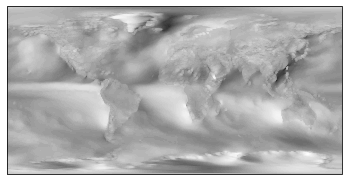

In [156]:
%matplotlib inline
from IPython.display import display, clear_output

cmap = mpl.colormaps["Greys_r"]

for i in np.arange(0, timesteps):
    # set the axes' spatial projection, styling, and title
    ax = plt.axes(projection=ccrs.PlateCarree())
    # ax.coastlines()
    # generate the contour map

    plt.contourf(
        lons,
        lats,
        climate_var[i],
        60,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )

    plt.savefig("./output/v_frame_{}.jpg".format(i), dpi=300)
    # ax.add_feature(cf.BORDERS, edgecolor="black")
    clear_output(wait = True)
    plt.pause(0.001)

